In [401]:
import pandas as pd
import numpy as np

In [402]:
# Load dataset
data = pd.read_csv(
    'teks_cleaning.csv'
    , header=0
)

# 1. Melakukan vektorisasi teks menggunakan Bag of Words (BoW)

In [403]:
from sklearn.feature_extraction.text import CountVectorizer

In [404]:
vectorizer = CountVectorizer()

# Mengubah teks menjadi vektor
X_bow = vectorizer.fit_transform(data['teks_tokenisasi'])

# Menfubah hasil vektor menjadi DataFrame
X_bow_df = pd.DataFrame( # Setiap kata yang muncul di data akan menjadi satu kolom dalam DataFrame
    X_bow.toarray() # Mengubah X_bow menjadi array
    , columns=vectorizer.get_feature_names_out() # Melihat daftar kata unik yang telah diekstrak
)

In [405]:
# Menywimpan DataFrame vektor Teks ke csv
X_bow_df.to_csv(
    'teks_bow.csv'
    , index=False
)

PermissionError: [Errno 13] Permission denied: 'teks_bow.csv'

In [ ]:
# Menambahkan fitur tambahan berupa panjang teks, rasio stopword, dan jumlah pos_tags
data_features = data[
    [
        'rasio_panjang_teks'
        , 'rasio_stopword'
        , 'rasio_pos_tagging'
    ]
].reset_index(drop=True)
X_fitur = pd.concat(
    [
        X_bow_df
        , data_features
    ], axis=1
)

X = X_fitur
y = data['label']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Inisialisasi model Logistic Regression dengan regularisasi lebih kuat
model = LogisticRegression(
    random_state=42
    , max_iter=1000
)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

# 2. Evaluasi Kinerja Model

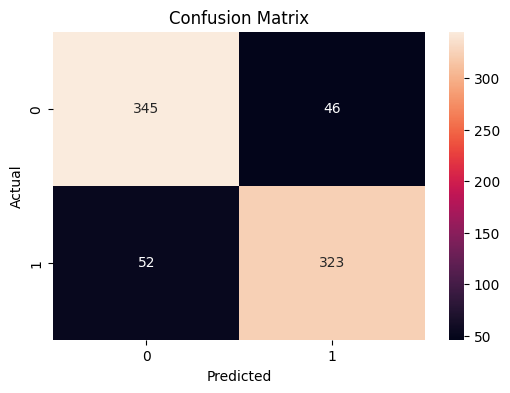

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
K=5
y_pred = cross_val_predict(
    model
    , X
    , y
    , cv=K
)
# Confusion matrix
cm = confusion_matrix(
    y
    , y_pred
)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm
    , annot=True
    , fmt='d'
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

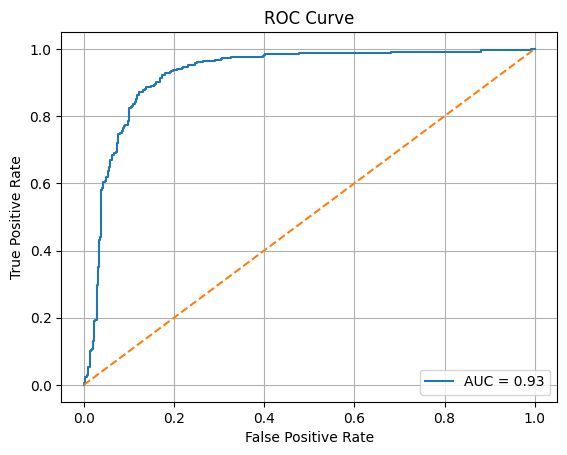

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Probabilitas dari prediksi
y_proba = cross_val_predict(
    model
    , X
    , y
    , cv=K
    , method='predict_proba'
)[:, 1]

fpr, tpr, _ = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Melatih model
model.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
import joblib

In [ ]:
# Menyimpan model dan vektor
joblib.dump(model, 'logistic_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']